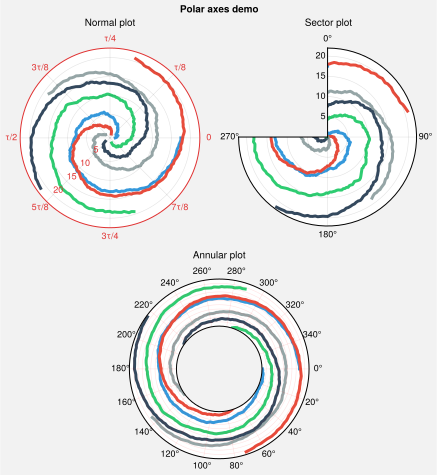

In [1]:
import proplot as plot
import numpy as np
N = 200
state = np.random.RandomState(51423)
x = np.linspace(0, 2 * np.pi, N)
y = 100 * (state.rand(N, 5) - 0.3).cumsum(axis=0) / N
fig, axs = plot.subplots([[1, 1, 2, 2], [0, 3, 3, 0]], proj='polar')
axs.format(
    suptitle='Polar axes demo', linewidth=1, titlepad='1em',
    ticklabelsize=9, rlines=0.5, rlim=(0, 19),
)
for i in range(5):
    xi = x + i * 2 * np.pi / 5
    axs.plot(xi, y[:, i], cycle='FlatUI', zorder=0, lw=3)

# Standard polar plot
axs[0].format(
    title='Normal plot', thetaformatter='tau',
    rlabelpos=225, rlines=plot.arange(5, 30, 5),
    color='red8', tickpad='1em',
)

# Sector plot
axs[1].format(
    title='Sector plot', thetadir=-1, thetalines=90, thetalim=(0, 270), theta0='N',
    rlim=(0, 22), rlines=plot.arange(5, 30, 5),
)

# Annular plot
axs[2].format(
    title='Annular plot', thetadir=-1, thetalines=20, gridcolor='red',
    r0=-20, rlim=(0, 22), rformatter='null', rlocator=2
)

/usr/share/miniconda3/envs/dash-docs/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


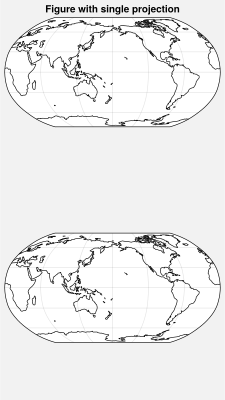

In [2]:
# Simple figure with just one projection

# Option 1: Create a projection manually with plot.Proj()
# immport proplot as plot
# proj = plot.Proj('robin', lon_0=180)
# fig, axs = plot.subplots(nrows=2, axwidth=3, proj=proj)

# Option 2: Pass the name to 'proj' and keyword arguments to 'proj_kw'
import proplot as plot
fig, axs = plot.subplots(nrows=2, axwidth=3, proj='robin', proj_kw={'lon_0': 180})
axs.format(
    suptitle='Figure with single projection',
    coast=True, latlines=30, lonlines=60,
)

In [3]:
# Complex figure with different projections
import proplot as plot
fig, axs = plot.subplots(
    ncols=2, nrows=3,
    hratios=(1, 1, 1.4),
    basemap=(False, True, False, True, False, True),  # cartopy column 1
    proj=('cyl', 'cyl', 'hammer', 'hammer', 'npstere', 'npstere'),
)
axs.format(
    suptitle='Figure with several projections',
    collabels=['Cartopy projections', 'Basemap projections'],
    coast=True, latlines=20, lonlines=30,
    lonlabels='b', latlabels='r',  # or lonlabels=True, labels=True, etc.
)
axs[0, :].format(latlines=30, lonlines=60, labels=True)
plot.rc.reset()

RuntimeError: Basemap is no longer maintained and is incompatible with matplotlib >= 3.3. Please use cartopy as your cartographic plotting backend or downgrade to matplotlib <= 3.2.

In [4]:
import proplot as plot
import numpy as np

# Fake data with unusual longitude seam location and without coverage over poles
offset = -40
lon = plot.arange(offset, 360 + offset - 1, 60)
lat = plot.arange(-60, 60 + 1, 30)
state = np.random.RandomState(51423)
data = state.rand(len(lat), len(lon))

# Plot data both without and with globe=True
for globe in (False, True,):
    string = 'with' if globe else 'without'
    fig, axs = plot.subplots(
        ncols=2, nrows=2, axwidth=2.5,
        proj='kav7', basemap={(1, 3): False, (2, 4): True}
    )
    axs.format(
        suptitle=f'Geophysical data {string} global coverage',
        collabels=['Cartopy example', 'Basemap example'],
        rowlabels=['Contourf', 'Pcolormesh'],
        abc=True, abcstyle='a)', abcloc='ul', abcborder=False,
        coast=True, lonlines=90,
    )
    for i, ax in enumerate(axs):
        cmap = ('sunset', 'sunrise')[i % 2]
        if i < 2:
            m = ax.contourf(lon, lat, data, cmap=cmap, globe=globe, extend='both')
            fig.colorbar(m, loc='b', span=i + 1, label='values', extendsize='1.7em')
        else:
            ax.pcolor(lon, lat, data, cmap=cmap, globe=globe, extend='both')

RuntimeError: Basemap is no longer maintained and is incompatible with matplotlib >= 3.3. Please use cartopy as your cartographic plotting backend or downgrade to matplotlib <= 3.2.

/usr/share/miniconda3/envs/dash-docs/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


/usr/share/miniconda3/envs/dash-docs/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


/usr/share/miniconda3/envs/dash-docs/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


/usr/share/miniconda3/envs/dash-docs/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


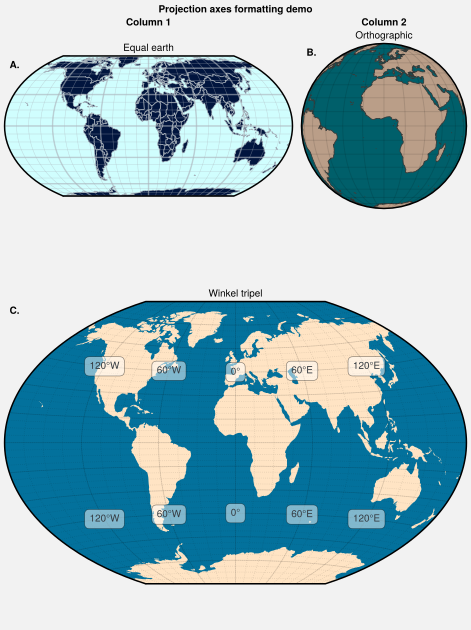

In [5]:
import proplot as plot
fig, axs = plot.subplots(
    [[1, 1, 2], [3, 3, 3]],
    axwidth=4, proj={1: 'eqearth', 2: 'ortho', 3: 'wintri'},
    wratios=(1, 1, 1.2), hratios=(1, 1.2),
)
axs.format(
    suptitle='Projection axes formatting demo',
    collabels=['Column 1', 'Column 2'],
    abc=True, abcstyle='A.', abcloc='ul', abcborder=False, linewidth=1.5
)

# Styling projections in different ways
ax = axs[0]
ax.format(
    title='Equal earth', land=True, landcolor='navy', facecolor='pale blue',
    coastcolor='gray5', borderscolor='gray5', innerborderscolor='gray5',
    gridlinewidth=1.5, gridcolor='gray5', gridalpha=0.5,
    gridminor=True, gridminorlinewidth=0.5,
    coast=True, borders=True, borderslinewidth=0.8,
)
ax = axs[1]
ax.format(
    title='Orthographic', reso='med', land=True, coast=True, latlines=10, lonlines=15,
    landcolor='mushroom', suptitle='Projection axes formatting demo',
    facecolor='petrol', coastcolor='charcoal', coastlinewidth=0.8, gridlinewidth=1
)
ax = axs[2]
ax.format(
    land=True, facecolor='ocean blue', landcolor='bisque', title='Winkel tripel',
    lonlines=60, latlines=15,
    gridlinewidth=0.8, gridminor=True, gridminorlinestyle=':',
    lonlabels=True, latlabels='r', loninline=True,
    gridlabelcolor='gray8', gridlabelsize='med-large',
)

In [6]:
import proplot as plot

# Plate Carrée map projection
plot.rc.reso = 'med'  # use higher res for zoomed in geographic features
proj = plot.Proj('cyl', lonlim=(-20, 180), latlim=(-10, 50), basemap=True)
fig, axs = plot.subplots(nrows=2, axwidth=5, proj=('cyl', proj))
axs.format(
    land=True, labels=True, lonlines=20, latlines=20,
    gridminor=True, suptitle='Zooming into projections'
)
axs[0].format(
    lonlim=(-140, 60), latlim=(-10, 50),
    labels=True, title='Cartopy example'
)
axs[1].format(title='Basemap example')

RuntimeError: Basemap is no longer maintained and is incompatible with matplotlib >= 3.3. Please use cartopy as your cartographic plotting backend or downgrade to matplotlib <= 3.2.

In [7]:
import proplot as plot

# Pole-centered map projections
proj = plot.Proj('npaeqd', boundinglat=60, basemap=True)
fig, axs = plot.subplots(ncols=2, axwidth=2.7, proj=('splaea', proj))
axs.format(
    land=True, latmax=80,  # no gridlines poleward of 80 degrees
    suptitle='Zooming into polar projections'
)
axs[0].format(boundinglat=-60, title='Cartopy example')
axs[1].format(title='Basemap example')

RuntimeError: Basemap is no longer maintained and is incompatible with matplotlib >= 3.3. Please use cartopy as your cartographic plotting backend or downgrade to matplotlib <= 3.2.

In [8]:
import proplot as plot

# Zooming in on continents
proj1 = plot.Proj('lcc', lon_0=0)  # cartopy projection
proj2 = plot.Proj('lcc', lon_0=-100, lat_0=45, width=8e6, height=8e6, basemap=True)
fig, axs = plot.subplots(ncols=2, axwidth=3, proj=(proj1, proj2))
axs.format(suptitle='Zooming into specific regions', land=True)
axs[0].format(lonlim=(-20, 50), latlim=(30, 70), title='Cartopy example')
axs[1].format(lonlines=20, title='Basemap example')

# Zooming to very small scale with degree-minute-second labels
plot.rc.reso = 'hi'
fig, axs = plot.subplots(ncols=2, axwidth=2.5, proj='cyl')
axs.format(
    land=True, labels=True,
    borders=True, borderscolor='white',
    suptitle='Degree-minute-second labels',
)
axs[0].format(lonlim=(-7.5, 2), latlim=(49.5, 59))
axs[1].format(lonlim=(-6, -2), latlim=(54.5, 58.5))
plot.rc.reset()

RuntimeError: Basemap is no longer maintained and is incompatible with matplotlib >= 3.3. Please use cartopy as your cartographic plotting backend or downgrade to matplotlib <= 3.2.

In [9]:
import proplot as plot

# Table of cartopy projections
projs = [
    'cyl', 'merc', 'mill', 'lcyl', 'tmerc',
    'robin', 'hammer', 'moll', 'kav7', 'aitoff', 'wintri', 'sinu',
    'geos', 'ortho', 'nsper', 'aea', 'eqdc', 'lcc', 'gnom',
    'npstere', 'nplaea', 'npaeqd', 'npgnom', 'igh',
    'eck1', 'eck2', 'eck3', 'eck4', 'eck5', 'eck6'
]
fig, axs = plot.subplots(ncols=3, nrows=10, width=7, proj=projs)
axs.format(
    land=True, reso='lo', labels=False,
    suptitle='Table of cartopy projections'
)
for proj, ax in zip(projs, axs):
    ax.format(title=proj, titleweight='bold', labels=False)

/usr/share/miniconda3/envs/dash-docs/lib/python3.8/site-packages/proplot/constructor.py:1421: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.
  proj = crs(**kwproj)


/usr/share/miniconda3/envs/dash-docs/lib/python3.8/site-packages/cartopy/mpl/feature_artist.py:154: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


In [10]:
import proplot as plot

# Table of basemap projections
projs = [
    'cyl', 'merc', 'mill', 'cea', 'gall', 'sinu',
    'eck4', 'robin', 'moll', 'kav7', 'hammer', 'mbtfpq',
    'geos', 'ortho', 'nsper',
    'vandg', 'aea', 'eqdc', 'gnom', 'cass', 'lcc',
    'npstere', 'npaeqd', 'nplaea'
]
fig, axs = plot.subplots(ncols=3, nrows=8, basemap=True, width=7, proj=projs)
axs.format(
    land=True, labels=False,
    suptitle='Table of basemap projections'
)
for proj, ax in zip(projs, axs):
    ax.format(title=proj, titleweight='bold', labels=False)

RuntimeError: Basemap is no longer maintained and is incompatible with matplotlib >= 3.3. Please use cartopy as your cartographic plotting backend or downgrade to matplotlib <= 3.2.